### Tugas Kecerdasan Komputasional
#### Reza Wahyu Ramadhan - 6025222007

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [145]:
# -----------------------------------------
# Data access
# 
# -----------------------------------------
df = pd.read_csv('datasets/mushrooms.csv')

# -----------------------------------------
# Show row and column on datasets
# 
# -----------------------------------------
print("\nDataframe dimension : ", df.shape)

# -----------------------------------------
# show 5 row of the data
# 
# -----------------------------------------
df.head()


Dataframe dimension :  (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [146]:
# -----------------------------------------
# Exploratory Data Analysis
# 
# -----------------------------------------

print(f'Missing values in dataset: {df.isna().sum().sum()}\n')
print(f'Duplicates in dataset: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)\n')
print(f'Data types: {df.dtypes.unique()}')

Missing values in dataset: 0

Duplicates in dataset: 0, (0.0%)

Data types: [dtype('O')]


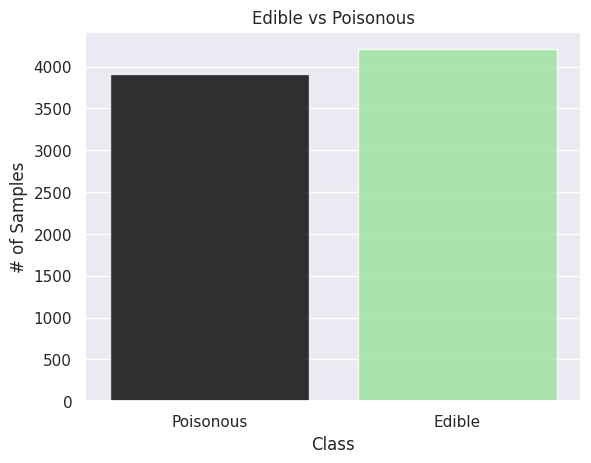

(8124, 23)

In [147]:
sns.set_style('darkgrid')
plt.figure()
fig1 = sns.countplot(x='class', data=df, alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()
df.shape

### Visualizing features

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- bruises?: bruises=1,no=0
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=1,free=0
- gill-spacing: close=0,crowded=1
- gill-size: broad=0,narrow=1
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- stalk-shape: enlarging=0,tapering=1
- stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


In [148]:
# -----------------------------------------
# Init function for show feature plotting
#
# and function to show feature plot stack
# with the class
# 
# -----------------------------------------

features = df.drop(columns='class')

def feature_plot(param):
    sns.set_style('white')
    plt.figure()
    sns.countplot(x=features[param], data=df, alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + param.title())
    plt.xlabel('Type of' + ' ' + param.title())
    

    plt.show()
    
def feature_plot_class(param):
    fig,ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(x=param,hue=df['class'],palette=['black','lightgreen'],data=df)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + param.title())
    plt.title('Mushroom' + ' ' + param.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])
    plt.show()

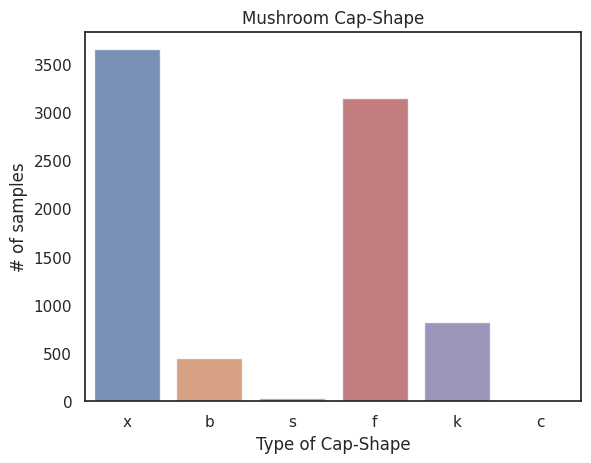

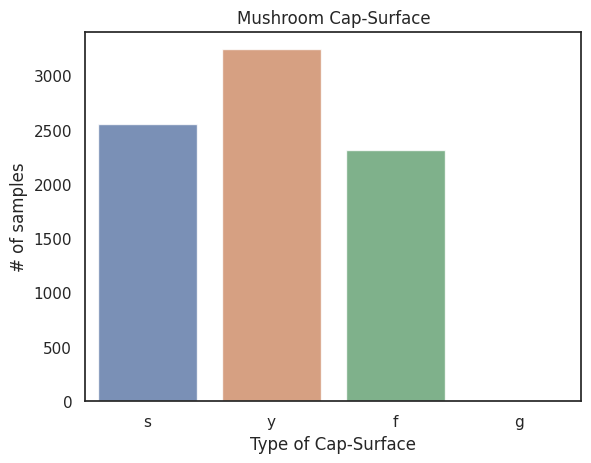

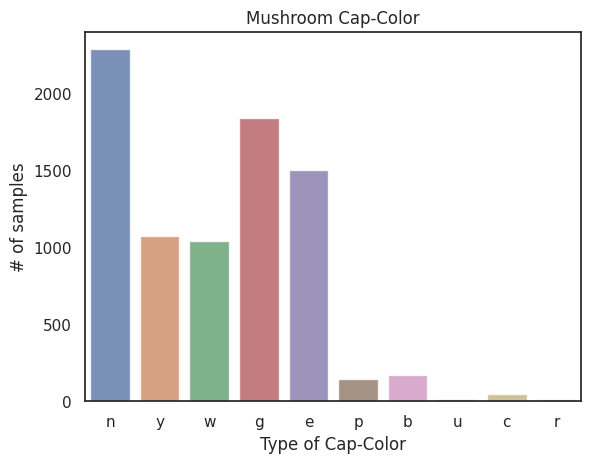

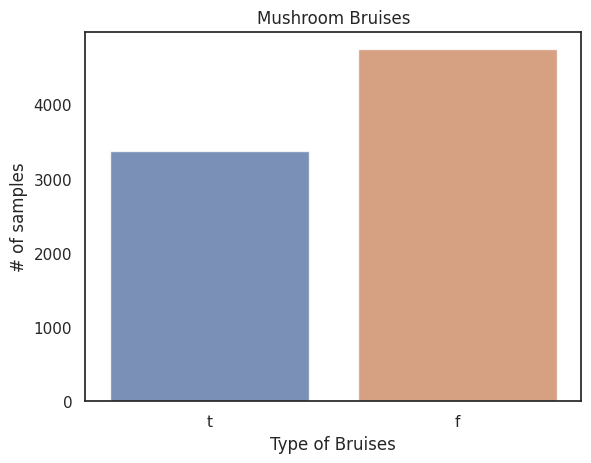

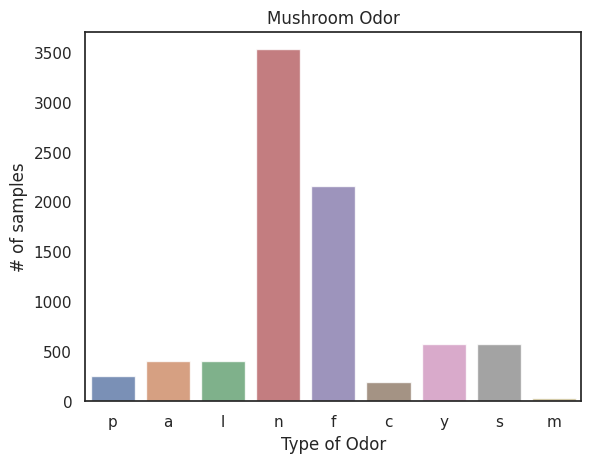

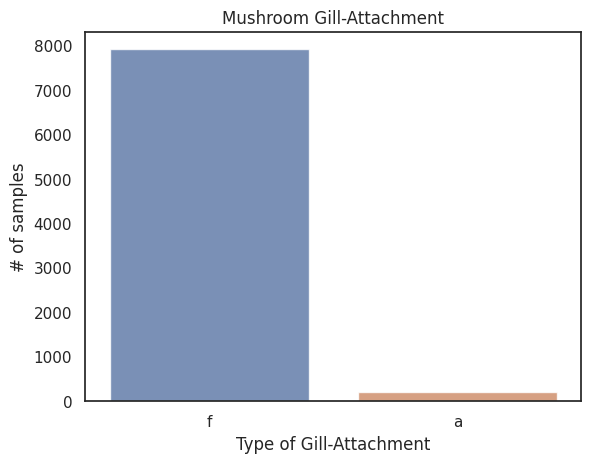

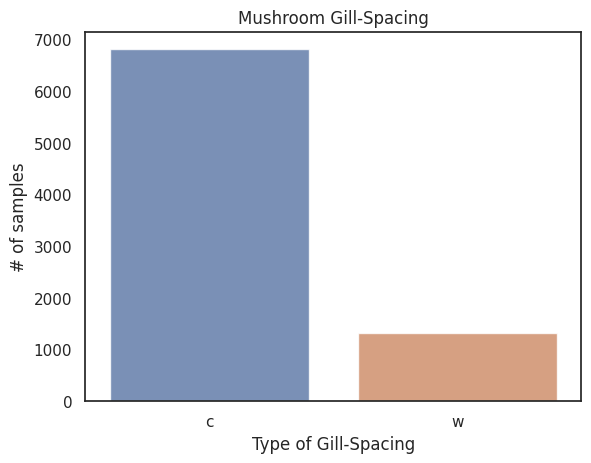

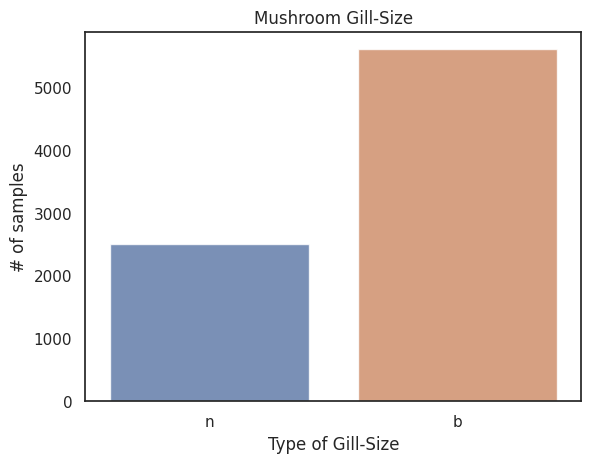

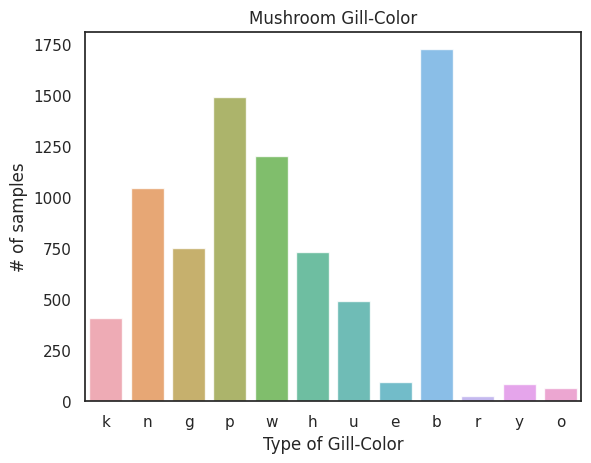

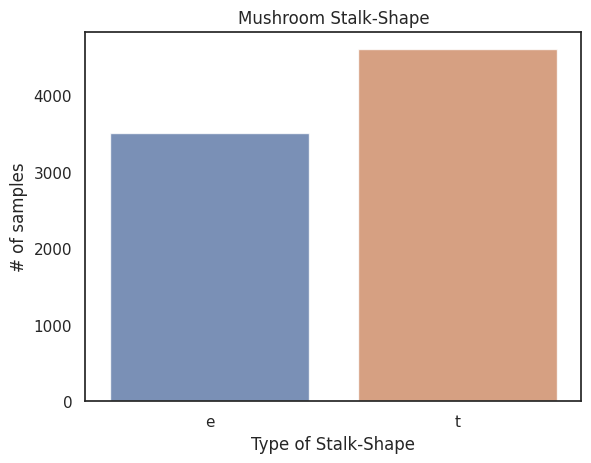

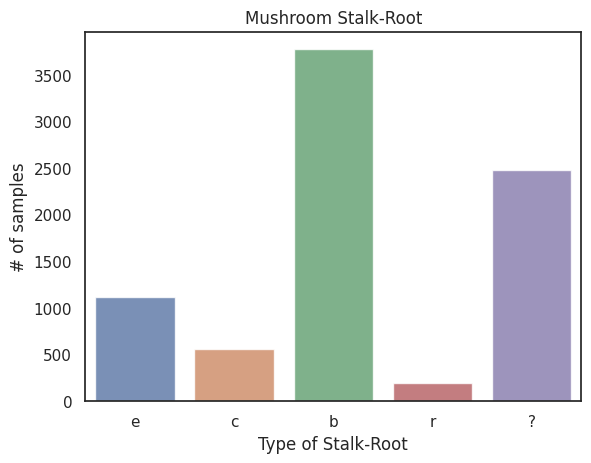

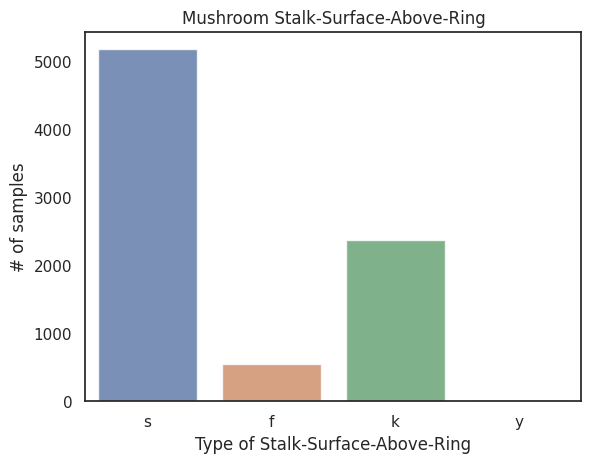

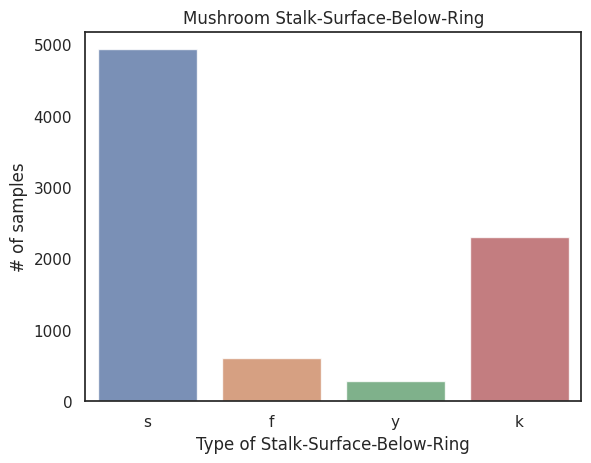

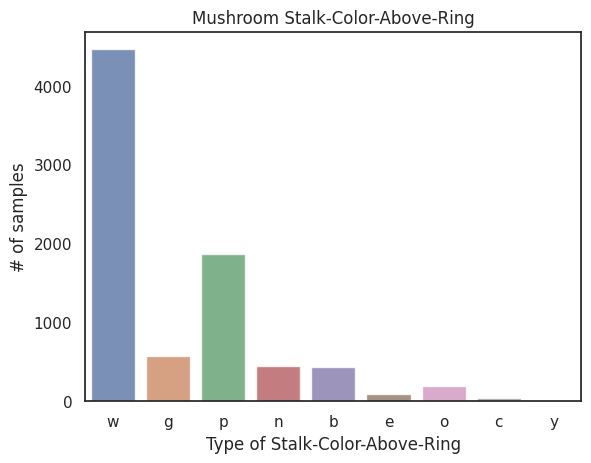

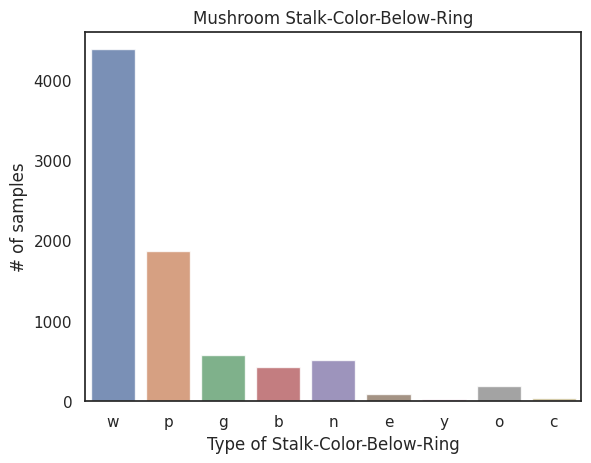

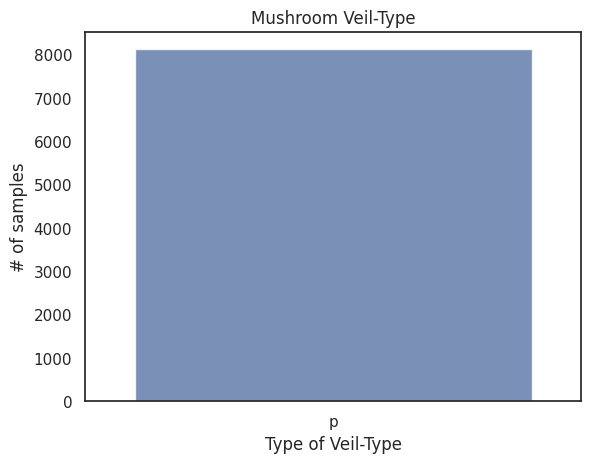

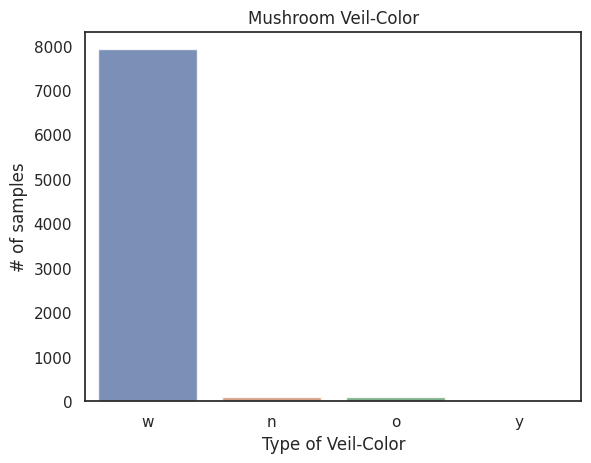

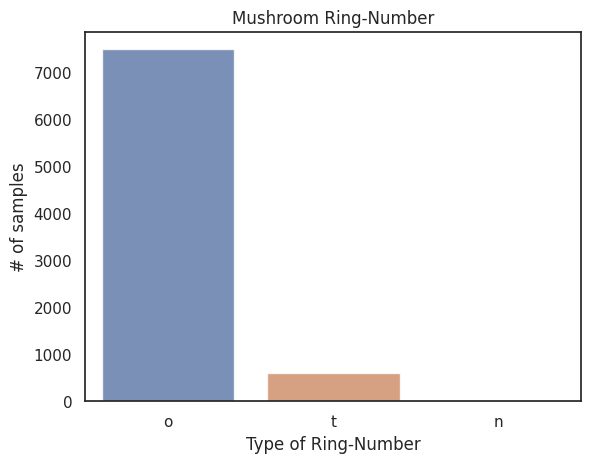

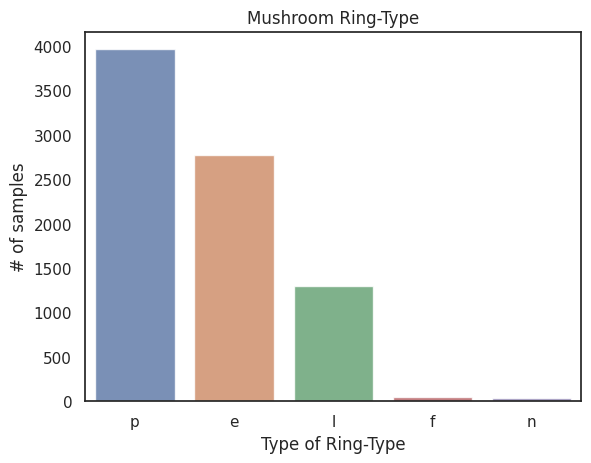

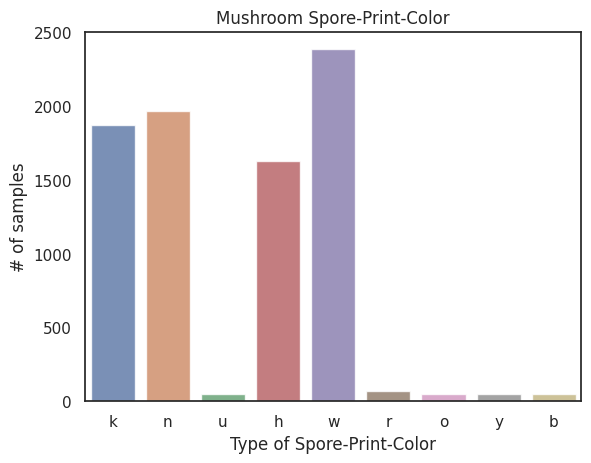

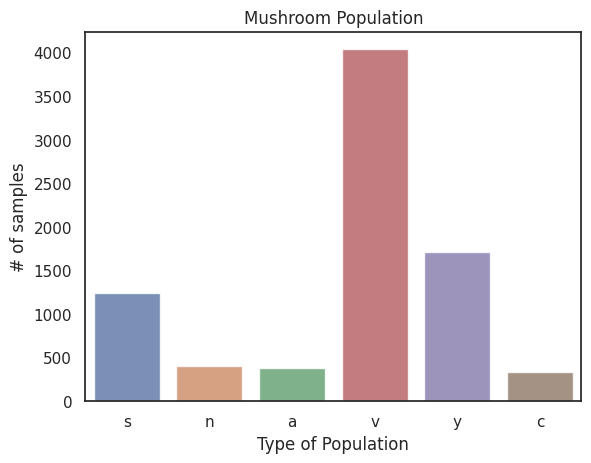

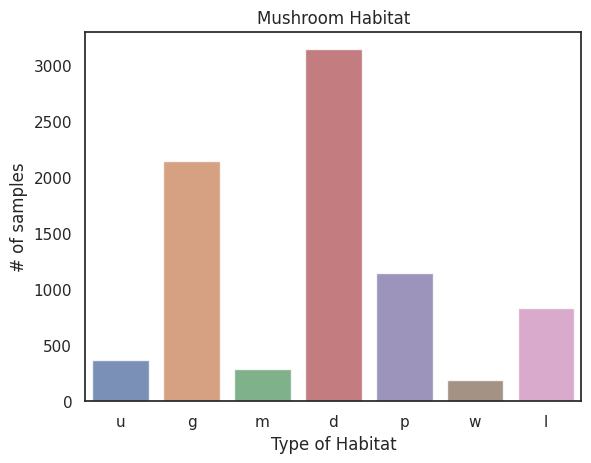

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [149]:
# -----------------------------------------
# Change the looping if you want to show
# certain feature
# 
# -----------------------------------------

[feature_plot(x) for x in data.columns]

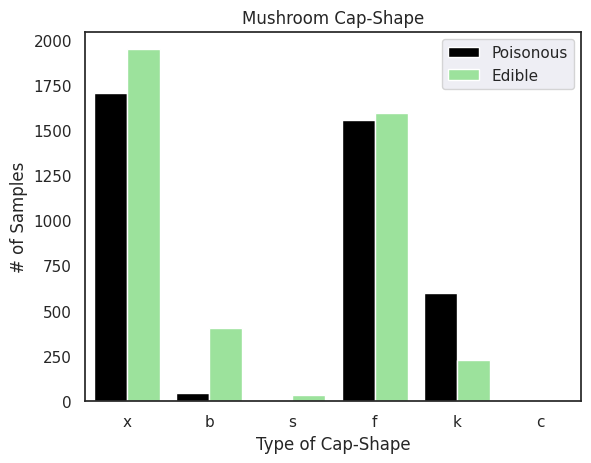

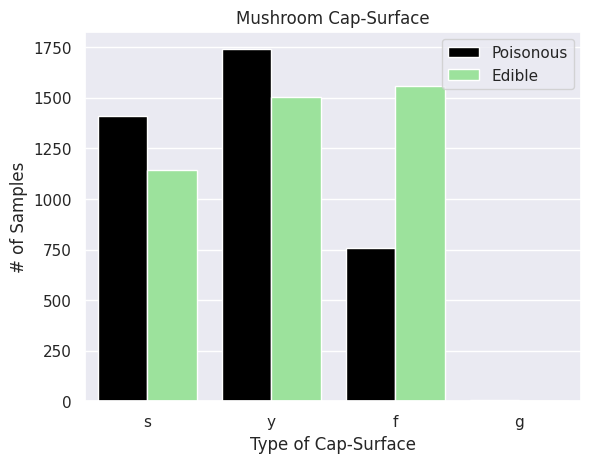

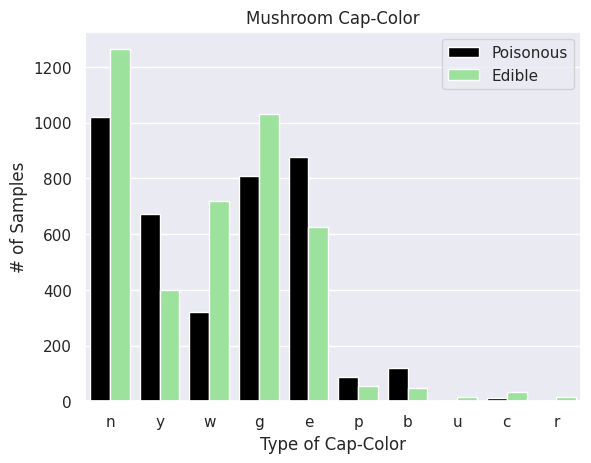

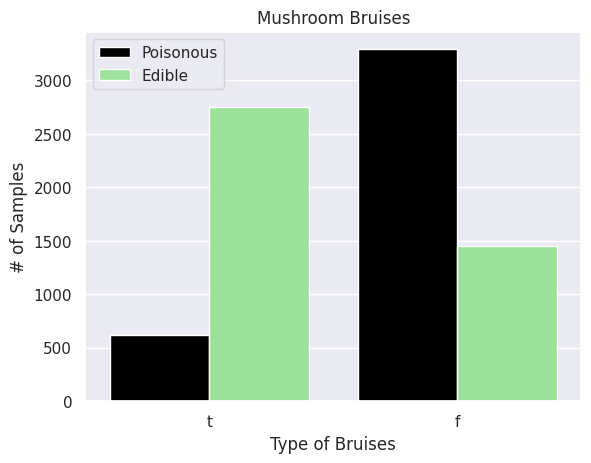

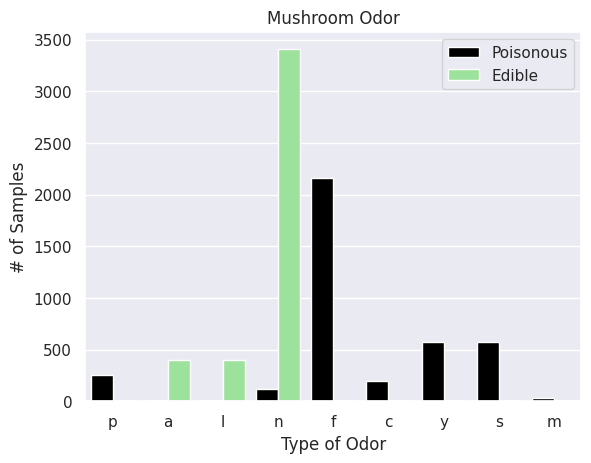

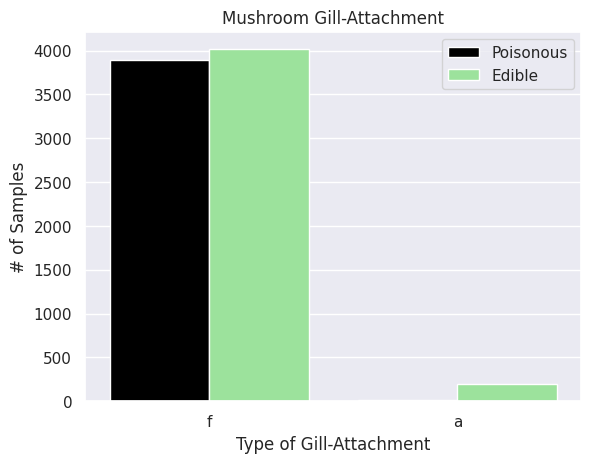

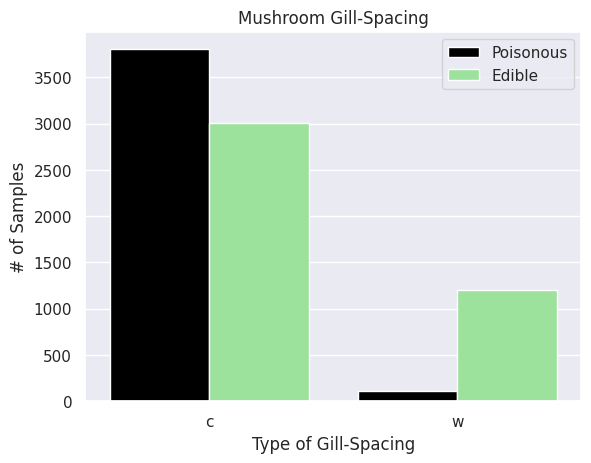

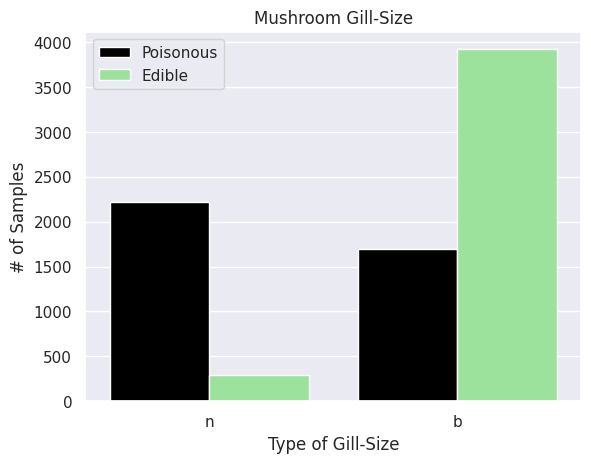

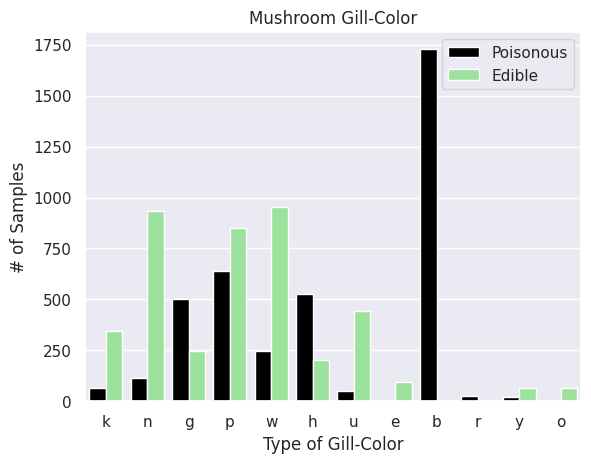

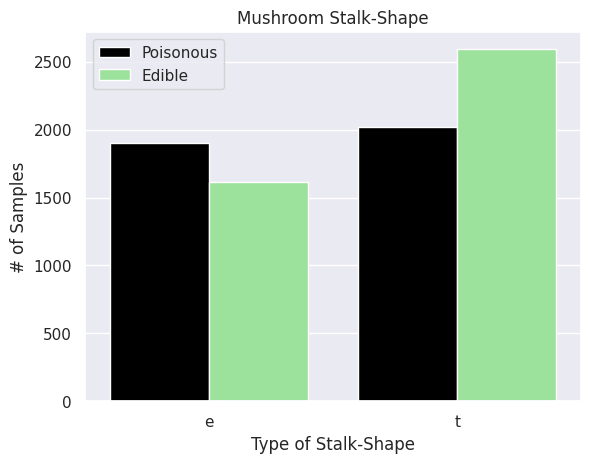

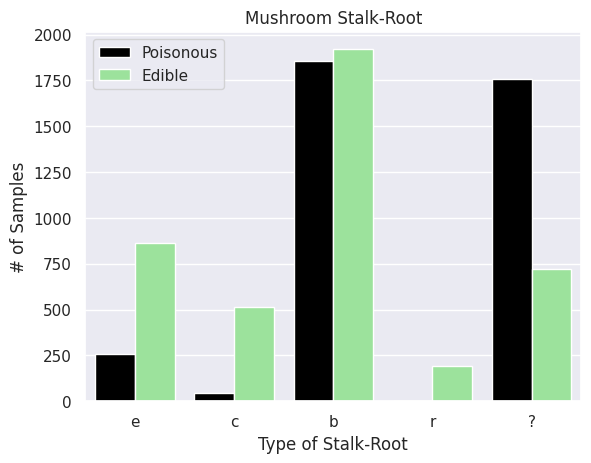

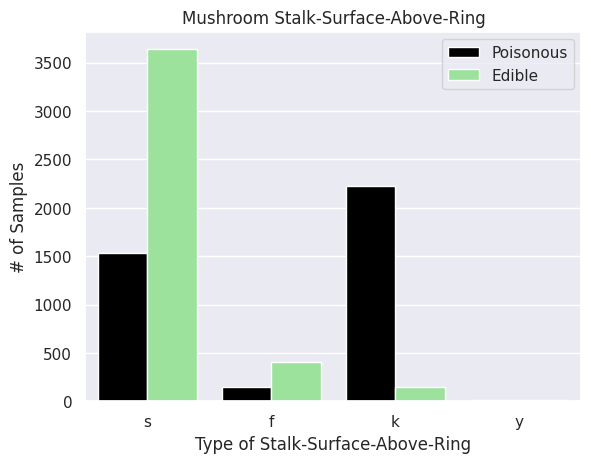

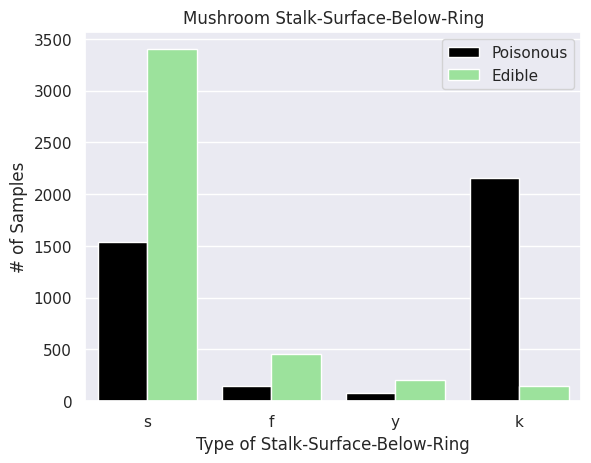

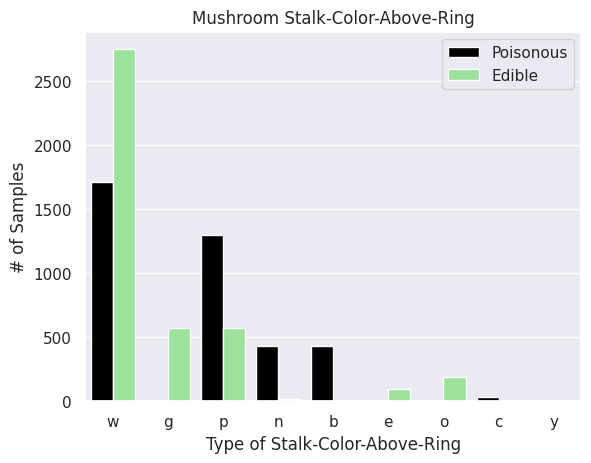

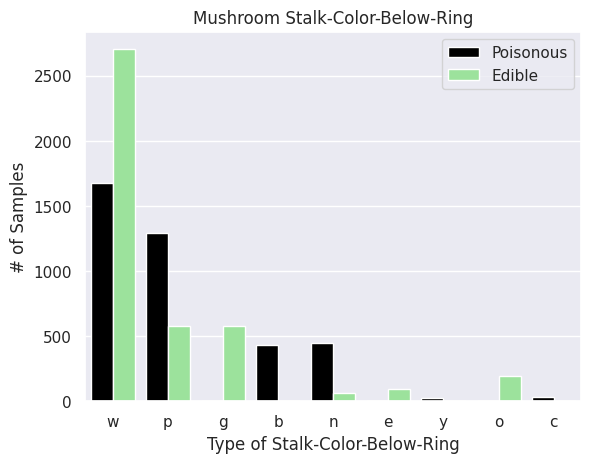

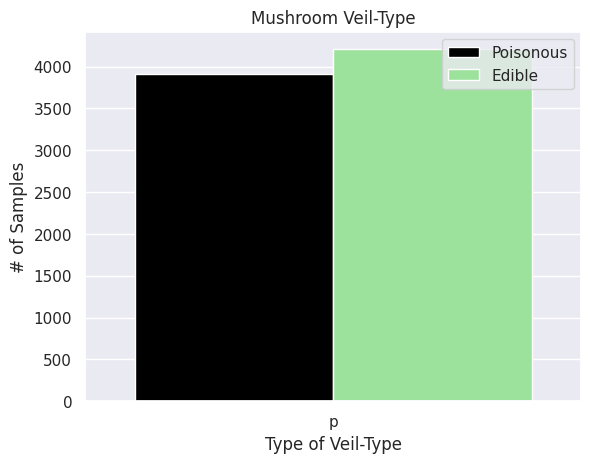

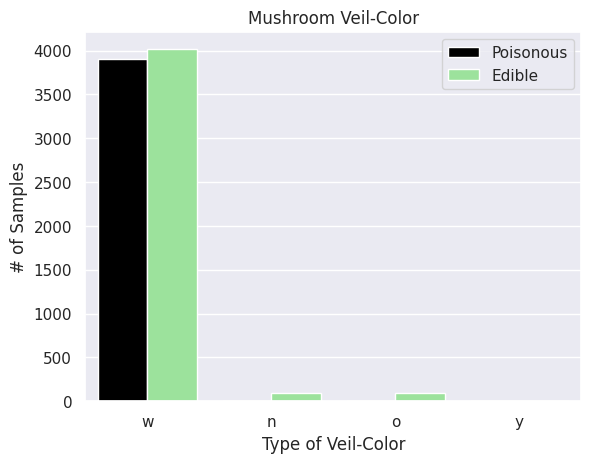

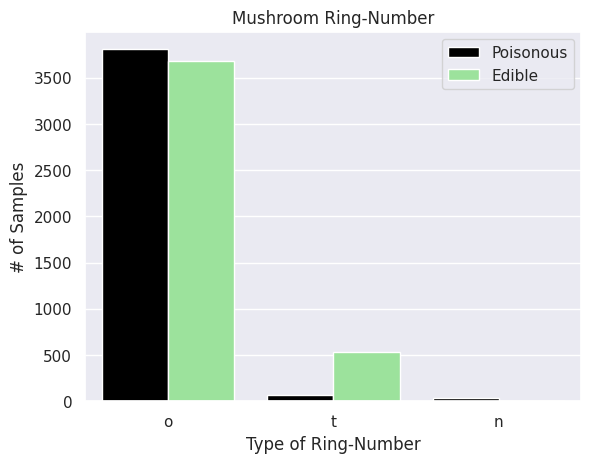

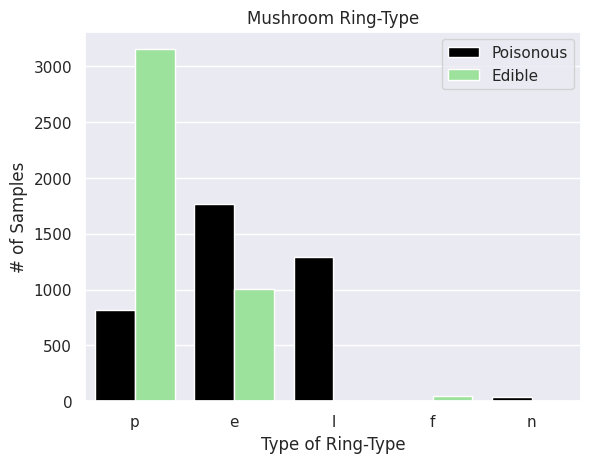

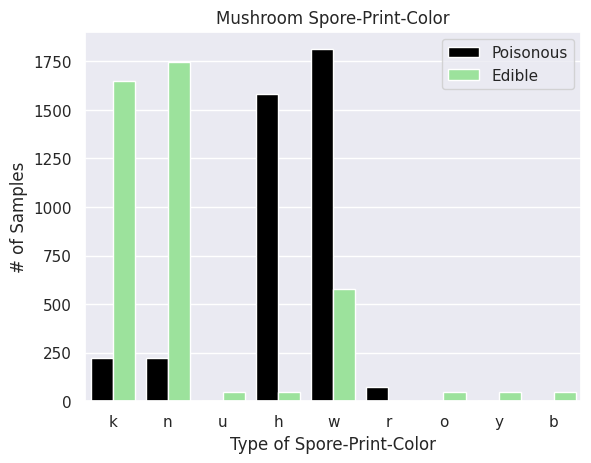

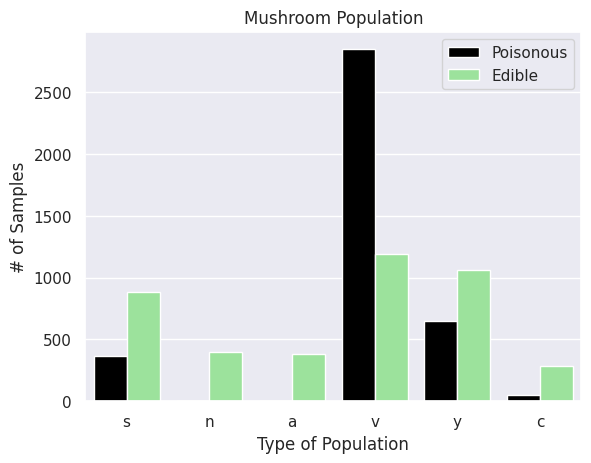

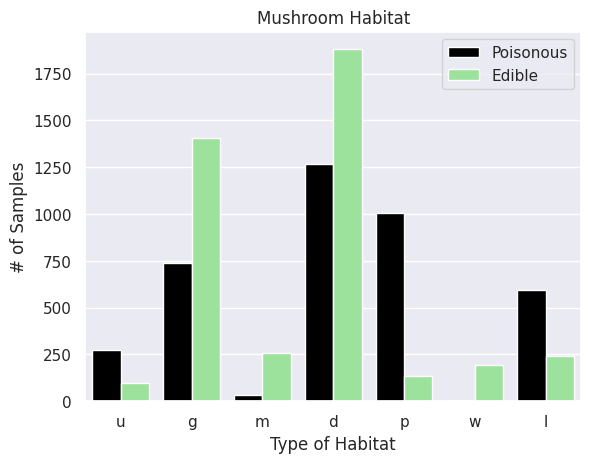

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [150]:
[feature_plot_class(x) for x in data.columns]

In [151]:
# -----------------------------------------
# Load dataset after encode applied, dataset
# was built by alison salerno, by removing
# the default feature to 1 or 0
# 
# -----------------------------------------

df = pd.read_csv('datasets/final_mushroom_data.csv',index_col=0)

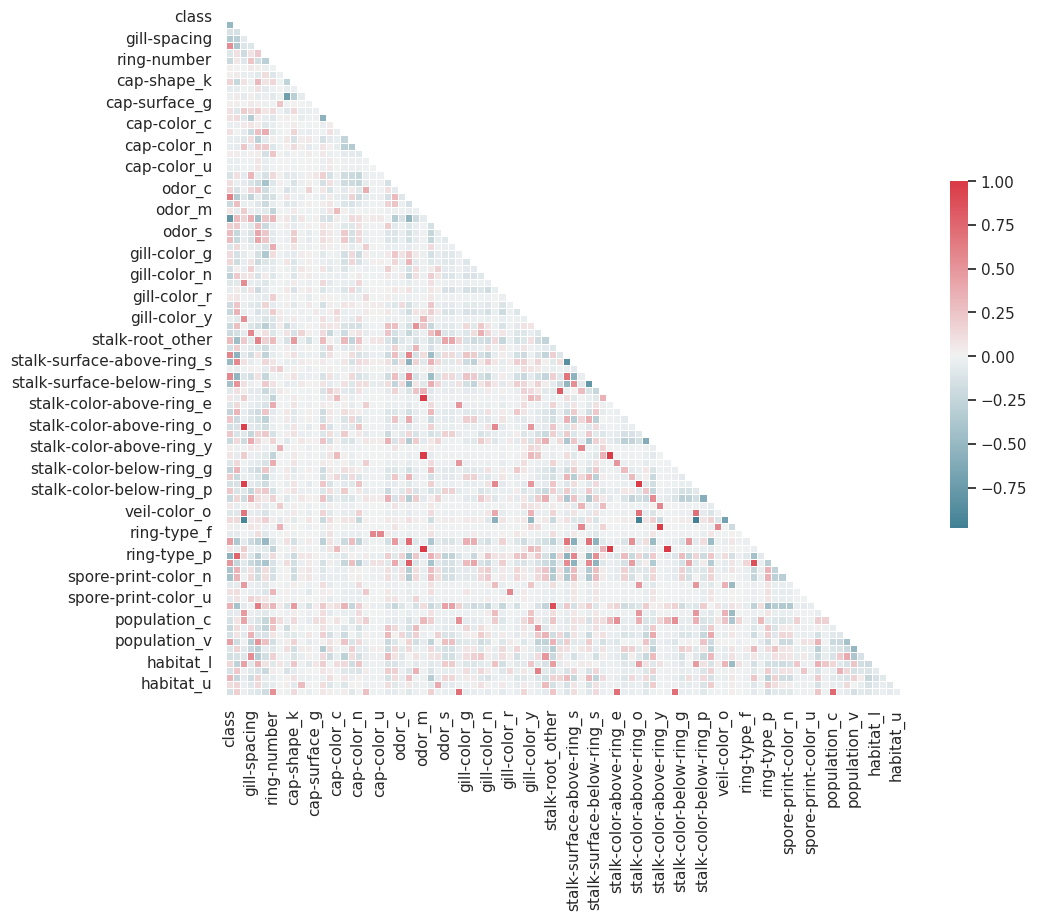

In [152]:
# -----------------------------------------
# Correlation matrix
#
# -----------------------------------------

corr=df.corr()
sns.set(style="white")

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [153]:
corr['class'].sort_values(ascending=False).head(10)

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size                     0.540024
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
spore-print-color_w           0.357384
habitat_p                     0.323346
Name: class, dtype: float64

### Modeling
Models that I run: Dummy Classifier (baseline), Logistic Regression, KNN, Decision Tree Classifier, Random Forest Classifier

- Gridsearch CV was used to tune hyperparameters and find the best model for each classifier (except the baseline model)

In [154]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [155]:
# -----------------------------------------
# Defining x as feature and y as target
#
# -----------------------------------------

y = df['class']
X = df.drop(['class'],axis=1)

In [156]:
# -----------------------------------------
# 1. Splitting data to data train and data validate
# 2. Determined function to get best result after
#    running gridsearch
# 3. Determined function to show the test result
#
#
# -----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

results_dict = {}

def examine_best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
    
def result(test, prediction):
    return "F1:", metrics.f1_score(test,prediction),"Accuracy:", metrics.accuracy_score(y_test,prediction)

X_train.shape, X_test.shape

((6499, 94), (1625, 94))

#### Dummy Classifier

In [157]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)

results_dict['Dummy Classifier'] = result(y_test,dummy_pred)
result(y_test,dummy_pred)

('F1:', 0.0, 'Accuracy:', 0.5089230769230769)

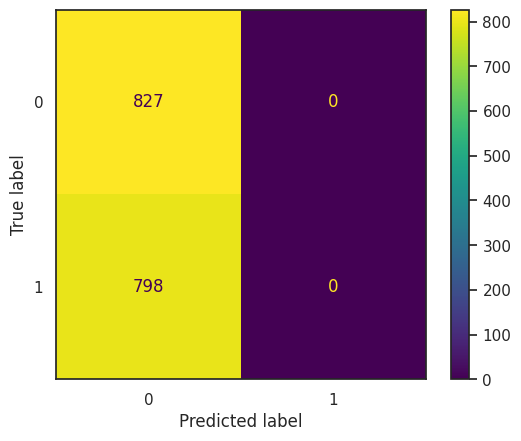

In [158]:
cm = confusion_matrix(y_test, dummy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Dummy Classifier Result
- Predicts the majority class of the training data (edible)
- Not applicable for real world usage as a false negative could be deadly

#### Logistic Regression with GridCV

In [159]:
logreg = LogisticRegression()
penalty = ['l2']
c_range = [0.001, 0.01, 0.1, 1]
solver = ['lbfgs']
parameters_lr = dict(C=c_range, penalty=penalty,solver=solver)
lr_1 = GridSearchCV(logreg,parameters_lr,scoring='accuracy',cv=3,verbose=1)

lr_1.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [160]:
examine_best_model(lr_1)

0.9992307455220683
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=1)


In [161]:
y_pred_lr_1 = lr_1.best_estimator_.predict(X_test)
results_dict['Log_Reg'] = result(y_test,y_pred_lr_1)
result(y_test,y_pred_lr_1)

('F1:', 0.9981167608286252, 'Accuracy:', 0.9981538461538462)

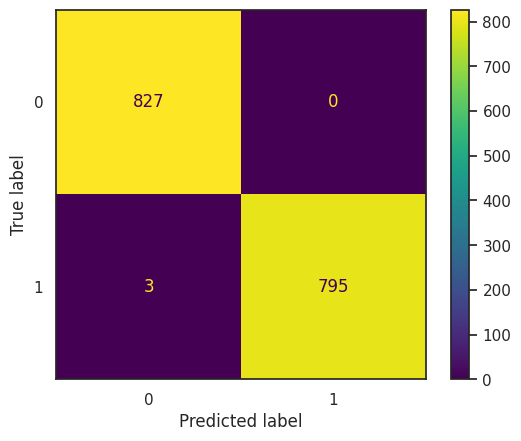

In [162]:
cm = confusion_matrix(y_test, y_pred_lr_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Logistic Regression with GridCV Result
- predicted really well: ('F1:', 0.9981167608286252, 'Accuracy:', 0.9981538461538462)
- after viewing the confusion matrix, the model had 3 false negatives which in terms of wild mushrooms could be deadly
- best params from the grid search: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

#### KNN with GridCV

In [163]:
knn = KNeighborsClassifier()
neighbors = [5,9,13]
metric = ['manhattan','euclidean']
algorithm = ['brute','ball_tree']
parameters_knn = dict(n_neighbors=neighbors,metric=metric,algorithm=algorithm)

In [164]:
grid_knn=GridSearchCV(knn,parameters_knn,cv=3,verbose=1)
grid_knn.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'ball_tree'],
                         'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [5, 9, 13]},
             verbose=1)

In [165]:
examine_best_model(grid_knn)

0.9995385325334564
{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5}
KNeighborsClassifier(algorithm='brute', metric='manhattan')


In [166]:
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
results_dict['KNN'] = result(y_test,y_pred_knn)
result(y_test,y_pred_knn)

('F1:', 1.0, 'Accuracy:', 1.0)

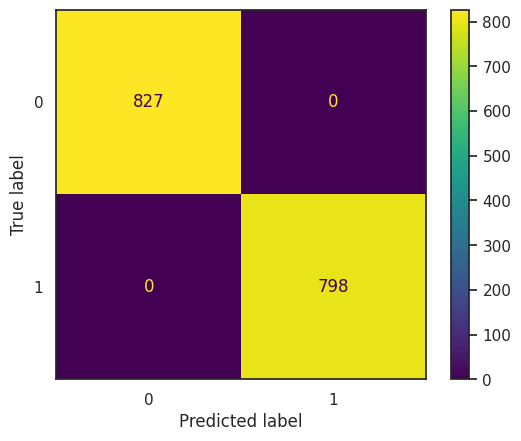

In [167]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### KNN with GridCV Result
- This model performed perfectly on the test and .99 on the training set
- Best params from the grid search: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5}

#### Decision Tree with GridCV
 

In [168]:
dtc = DecisionTreeClassifier(random_state=1)
param_grid = {'max_depth': [1,11,15],
            'min_samples_leaf': [2,10,30],
            'splitter': ['best','random'],
            'criterion':['gini','entropy']}
dtc_grid = GridSearchCV(dtc, param_grid, cv=3,verbose=1)
dtc_grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 15],
                         'min_samples_leaf': [2, 10, 30],
                         'splitter': ['best', 'random']},
             verbose=1)

In [169]:
examine_best_model(dtc_grid)

0.9995385325334564
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, random_state=1)


In [170]:
y_pred_gridtree = dtc_grid.best_estimator_.predict(X_test)
results_dict['DTC_Grid'] = result(y_test,y_pred_gridtree)
result(y_test,y_pred_gridtree)

('F1:', 1.0, 'Accuracy:', 1.0)

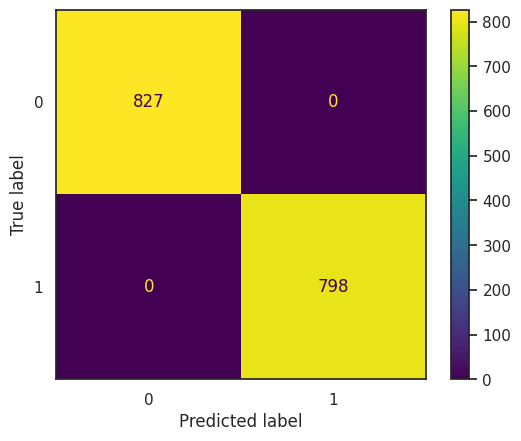

In [171]:
cm = confusion_matrix(y_test, y_pred_gridtree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

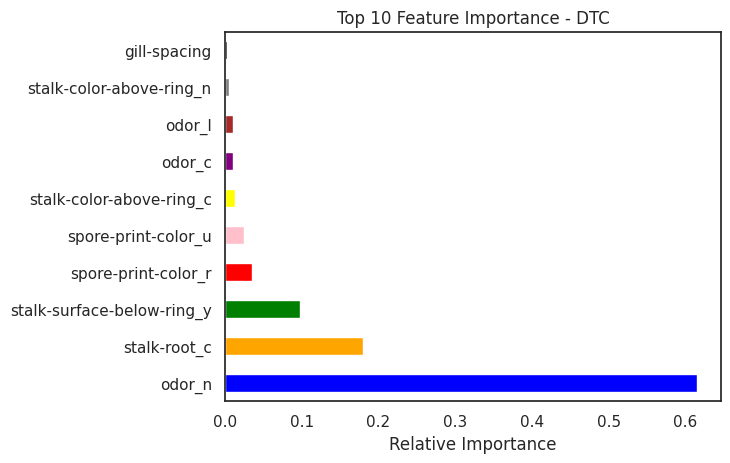

In [172]:
feat_importances = pd.Series(dtc_grid.best_estimator_.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color=['blue','orange','green','red','pink','yellow','purple','brown','gray','black'])
plt.title("Top 10 Feature Importance - DTC")
plt.xlabel('Relative Importance')
plt.show()

#### Decision Tree with GridCV Result

- Performed perfectly
- Best params from grid search: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'splitter': 'best'}
- top 10 feature importance is shown on plot above

#### Random Forest Classifier with GridCV

In [173]:
rfc = RandomForestClassifier()
param_grid_rfc = {
    'max_depth': [5,11],
    'n_estimators': [200,500],
    'max_features': [50,75,90],
    'min_samples_leaf': [2,6],
}
grid_rfc = GridSearchCV(rfc,param_grid_rfc,cv=3,scoring='accuracy',n_jobs=-1,verbose=1)
grid_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 11], 'max_features': [50, 75, 90],
                         'min_samples_leaf': [2, 6],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=1)

In [175]:
examine_best_model(grid_rfc)

0.9995385325334564
{'max_depth': 11, 'max_features': 50, 'min_samples_leaf': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=11, max_features=50, min_samples_leaf=2,
                       n_estimators=200)


In [176]:
y_pred_rfc2 = grid_rfc.predict(X_test)
results_dict['RFC'] = result(y_test,y_pred_rfc2)
result(y_test,y_pred_rfc2)

('F1:', 1.0, 'Accuracy:', 1.0)

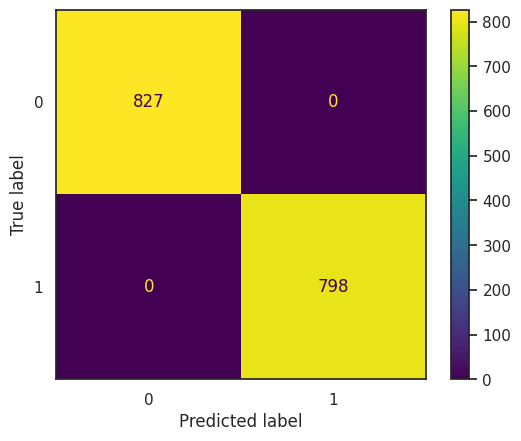

In [177]:
cm = confusion_matrix(y_test, y_pred_rfc2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

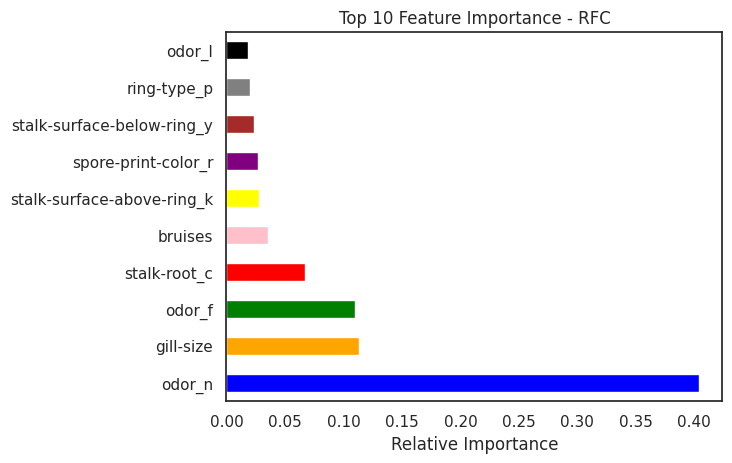

In [178]:
feat_importances_2 = pd.Series(grid_rfc.best_estimator_.feature_importances_,index=X.columns)
feat_importances_2.nlargest(10).plot(kind='barh',color=['blue','orange','green','red','pink','yellow','purple','brown','gray','black'])
plt.title("Top 10 Feature Importance - RFC")
plt.xlabel('Relative Importance')
plt.show()

#### Random Forest Classifier with GridCV Result
- model performance was perfectly accurate as well
- best params: {'max_depth': 11, 'max_features': 50, 'min_samples_leaf': 2, 'n_estimators': 200}
- Feature importances vary slightly with the DTC

### Conclusion

In [182]:
results_dict

{'Dummy Classifier': ('F1:', 0.0, 'Accuracy:', 0.5089230769230769),
 'Log_Reg': ('F1:', 0.9981167608286252, 'Accuracy:', 0.9981538461538462),
 'KNN': ('F1:', 1.0, 'Accuracy:', 1.0),
 'DTC_Grid': ('F1:', 1.0, 'Accuracy:', 1.0),
 'RFC': ('F1:', 1.0, 'Accuracy:', 1.0)}

These 4 classification models all performed really well with the dataset. Logistic Regression, which had a score of 99% would normally be a great choice but given that the model predicted false negatives which could be deadly, and the other models performed perfectly, the other models are much better suited to classify mushrooms.